# Examen parcial 2 (raizes y ~interpolacion)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 04.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio

Bajo ciertas condiciones, los dispositivos ópticos como los láseres pueden mostrar un comportamiento complejo en el perfil del rayo de luz.


<table><tr>
<td> <img src="nonlinear_behaviour.png" width="600" /> </td>
</tr></table>
 
Para un dispositivo óptico particular que consiste en un medio no lineal dentro de una cavidad óptica, esto sólo ocurre cuando la intensidad I se encuentra dentro de un cierto rango que está dado por la ecuación: 

$$f(x)=(x+1)^2 - c(x-1) < 0 $$

donde $x$ es la intensidad del campo eléctrico y $c$ es la fuerza de la absorción del 
medio no lineal. 

## 1. 
Cree una función llamada `f_cost` que reciba dos parámetros (x,c) y solo devuelva la función f(x) como se mencionó anteriormente.

In [ ]:
def f_cost(x,c):
    return (x+1)**2 -c*(x-1)



## 2. 
Usando funcion `f_cost` haz un gráfico con cuatro curvas para c=5,10,15,20 y con x entre -10,20 (50 puntos)
* hacer que cada curva sea de un color diferente
* añadir etiquetas

<function matplotlib.pyplot.show>

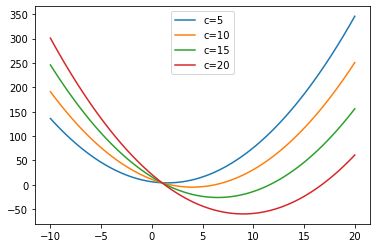

In [ ]:
import numpy as np 
import scipy.optimize as optimize
import matplotlib.pyplot as plt

xvec=np.linspace(-10,20,100)

yvec1=f_cost(xvec,5)

yvec2=f_cost(xvec,10)

yvec3=f_cost(xvec,15)

yvec4=f_cost(xvec,20)

fig ,ax = plt.subplots(1,1)

ax.plot(xvec,yvec1 ,label='c=5')
ax.plot(xvec,yvec2,label='c=10')
ax.plot(xvec,yvec3,label='c=15')
ax.plot(xvec,yvec4,label='c=20')
ax.legend()
plt.show


## 2a. Para cual `c` esta funcion no tiene raices?

In [ ]:
#respuesta:
#En la grafica se ve que f(x) nunca se hace cero para c=5 por lo que no hay raices en c=5


## 3. 
Cree una función llamada `root_finding()` que devuelva el valor de la raíz (si existiera) para cada parametro `c` (pense `Newton` o `bisecion`). Usando esta funcion vamos a buscar primero raiz izquierda y despues raiz derecha.

In [ ]:
# tu codigo:
def root_finding(f_cost,start,c): 
    try:
        root = optimize.newton(f_cost, start,args=(c,))
    except:
        root=np.nan
    return root


    

## 4a. 
Primero vamos a mirar el comportamiento de raiz de lado izquierda: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `left_roots`

In [ ]:
c_vec=np.linspace(5,100,50)

leftroots=[]
start=2
for c in c_vec:
    try:
        root = root_finding(f_cost,start,c)
    except:
        root=np.nan
        
    leftroots.append(root)


## 4b 
Hacer un gráfico de raíz izquierda vs c

Text(0, 0.5, 'root')

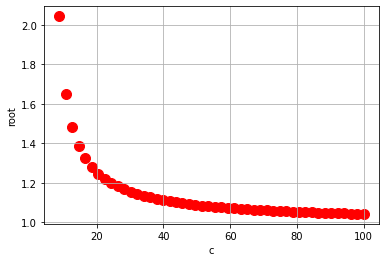

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
#ax.plot(c_vec,results,'.k')
ax.scatter(c_vec,leftroots,s=100,c='r')
ax.grid('True')
ax.set_xlabel('c')
ax.set_ylabel('root')



## 5a. 
Ahora vamos a mirar el comportamiento de raiz de lado derecha: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `right_roots`.

In [ ]:
c_vec=np.linspace(5,100,50)

rightroots=[]
start=100
for c in c_vec:
    try:
        root = root_finding(f_cost,start,c)
    except:
        root=np.nan
        
    rightroots.append(root)


## 5b
* Hacer un gráfico de raíz derecha vs c

Text(0, 0.5, 'root')

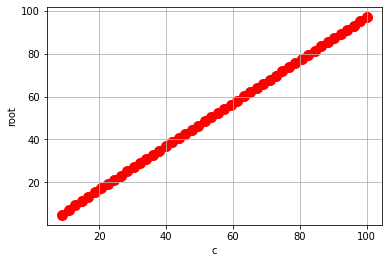

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
#ax.plot(c_vec,results,'.k')
ax.scatter(c_vec,rightroots,s=100,c='r')
ax.grid('True')
ax.set_xlabel('c')
ax.set_ylabel('root')


## 6. 
Pregunta:
* este cierto *rango* para cual se obtiene un comportamiento complejo esta convergente o divergente cuando `c` es creciente
* si este rango esta convergiendo, ¿a qué valor?
* si este rango esta divergente, como esta divergente (lineal, cuadrático, diferente)

In [ ]:
# respuesta:
#Las raices de la izquierda tienden a un valor maximo de 1  y las raices de la derecha tienden a infinito 
#las raices de la derecha crecen linealmente por lo que al restarles las raices de la izquierda  para encontrar el rango 
# este tambien diverge de forma lineal. 
#
#

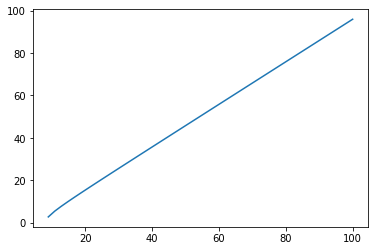

In [ ]:
r=np.array(rightroots)
l=np.array(leftroots)

rango = r-l
 
plt.plot(c_vec, rango)


# Feedback:

`Correct implementation of the f_cost function + labeled plot 	  (max 2.0p):	2.0p`
`Correct implementation of the root finding function 		       (max 2.0p):	2.0p`
`Correct result of the evolution of the left roots (+ plot)	     (max 2.0p):	2.0p`
`Correct result of the evolution of the right roots (+ plot)	    (max 2.0p):	2.0p`
`Correct conclusion of the range behavious			              (max 2.0p):	2.0p`

`- Total:                                                          (max 10.0p):   10.0p`
`